* `conda create -n myenv python=3.10 pandas jupyter seaborn scikit-learn keras tensorflow`
* `conda activate myenv`

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
df = pd.read_csv("diabetes.csv", sep=",");
print(df.head());

     id   chol  stab.glu   hdl  ratio  glyhb    location  age  gender  height  \
0  1000  203.0        82  56.0    3.6   4.31  Buckingham   46  female    62.0   
1  1001  165.0        97  24.0    6.9   4.44  Buckingham   29  female    64.0   
2  1002  228.0        92  37.0    6.2   4.64  Buckingham   58  female    61.0   
3  1003   78.0        93  12.0    6.5   4.63  Buckingham   67    male    67.0   
4  1005  249.0        90  28.0    8.9   7.72  Buckingham   64    male    68.0   

   weight   frame  bp.1s  bp.1d  bp.2s  bp.2d  waist   hip  time.ppn  
0   121.0  medium  118.0   59.0    NaN    NaN   29.0  38.0     720.0  
1   218.0   large  112.0   68.0    NaN    NaN   46.0  48.0     360.0  
2   256.0   large  190.0   92.0  185.0   92.0   49.0  57.0     180.0  
3   119.0   large  110.0   50.0    NaN    NaN   33.0  38.0     480.0  
4   183.0  medium  138.0   80.0    NaN    NaN   44.0  41.0     300.0  


In [33]:
# Specify the data set that we are going to work on
# We need this combined dataset to drop NaN values. 
combined_db = df[['waist', 'age', 'chol', 'glyhb']].dropna()

# X is for features
# uppercase variable namings are used for multi dimensional matrices
X = combined_db[['waist', 'age', 'chol']]

# Initialize scaler
scaler = StandardScaler();

# scaled features
X_scaled = scaler.fit_transform(X);

# lowercase variables are used for single dimensional vectors
y = combined_db['glyhb']

In [34]:
# X has 387 lines
# X_train will be 309
# X_test will be 78
# same applies to y
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Create and Train the Linear Regression Model

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions

In [39]:
y_pred = model.predict(X_test)

## Evaluate the Model with Mean Squared Error

In [40]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.9235919954515746


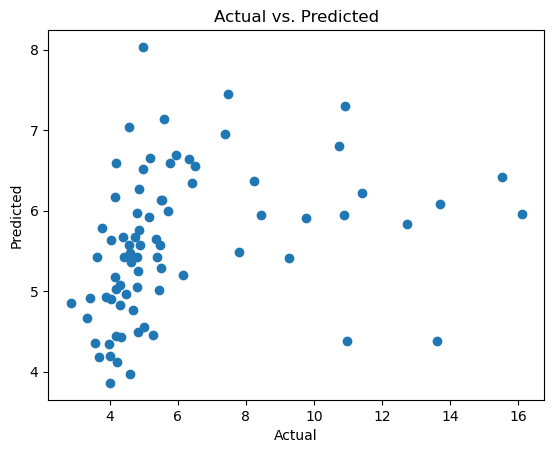

In [38]:
from matplotlib import pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()

In [41]:
# Assuming you have already calculated the MSE as mse

# Calculate the variance of the target variable y
var_y = np.var(y_test)

# Calculate the Percentage of Explained Variance (% EV)
percent_ev = 100 * (1 - mse / var_y)

print("Percentage of Explained Variance (% EV):", percent_ev)


Percentage of Explained Variance (% EV): 6.623955852811381
